In [1]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Question 2

Use basic Python operators to find the number of seconds in the month of June. Find the
number of seconds that have lapsed between 1 June at noon and 14 Aug, 9:30 AM.

In [2]:
import calendar #Use the calendar package to give the number of days in any month for any year
days = calendar.monthrange(2018,6)[1] #Find number of days in June
seconds = days * 24 * 60 * 60 #Calculate the number of seconds based on the number of days
print('The number of seconds in June is', seconds) #Print the result

import datetime as dt #Use datetime package to assign a value to both given dates
date1 = dt.datetime(2018,6,1,12,0,0)
date2 = dt.datetime(2018,8,14,9,30,0)
tot_sec = (date2-date1).total_seconds(); #find the difference between the two dates and give results in seconds
print(tot_sec,'seconds have lapsed between 1 June, 1200 and 14 Aug, 0930')

The number of seconds in June is 2592000
6384600.0 seconds have lapsed between 1 June, 1200 and 14 Aug, 0930


## Question 3

Import a table (‘world_population.csv’) and find: <br> 
a. The population in 2015 (the dataset begins at 1950).

In [10]:
pop_table = Table.read_table('world_population.csv').column('Population') #Import the data from the csv file
pop_2015 = pop_table.item(-1)
print(pop_2015) #print the most recent year that data exists

7256490011


b. The population growth between 1950 and 2015.

In [11]:
pop_1950 = pop_table.item(0) #Index the oldest cata value
tot_growth = pop_2015 - pop_1950 #Compute the difference in the first and last value in the dataset
print(tot_growth)

4698861357


c. The average annual growth rate over the course of the dataset.

In [12]:
ave_growth = (tot_growth / pop_1950) / len(pop_table) #Compute and print the average growth rate over the length of the dataset
print(ave_growth)

0.02783628066338302


## Question 4

The ‘Titanic’ dataset describes passengers on the Titanic when it sank. Url:
https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv.
Information about this dataset can be found at a kaggle site
(https://www.kaggle.com/c/titanic). Import this dataset and answer the following
questions:

a. Relabel the ‘Pclass’ column to ‘passenger_class’.

In [13]:
url = "https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv"
titanic_table = Table.read_table(url)
    #Import the data from the given url
    
titanic_update1 = titanic_table.relabeled("Pclass","Passenger_class") #Update the column header
titanic_update1

PassengerId,Survived,Passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


b. Create a new column ‘family_size’ that adds the number of siblings/spouses,
‘SibSp’, to the number of children, ‘Parch’.

In [14]:
siblings = titanic_update1.column("SibSp")
relatives = titanic_update1.column("Parch")
count = siblings + relatives
titanic_update2 = titanic_update1.with_column("family_size",count) #Add a olumn with the combined family size
titanic_update2

PassengerId,Survived,Passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


c. Create a barplot of number of passengers, broken down by passenger class.
HINT: you will need to use the group method on the dataset; for more info, see
the datascience package help.

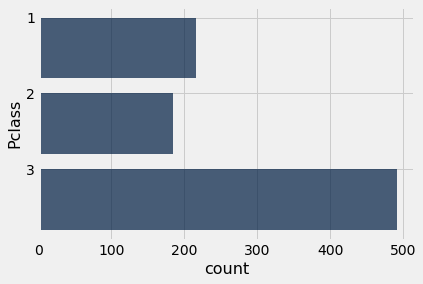

In [15]:
graph_table = titanic_update2.group("Pclass") #Group the dataset by class
graph_table.barh("Pclass","count") #Print a barpolot of the result

d. Sort the data by age and show the youngest 5 passengers.

In [16]:
young_titanic = titanic_update2.sort("Age")
young_titanic.show(5) #Sort by age and show the first 5

PassengerId,Survived,Passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C,1
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2


e. Now sort by age from oldest to youngest and show the oldest 5 passengers.
What did you notice? Eliminate these “nan” values and try again.

In [19]:
old_titanic = titanic_update2.sort("Age", descending = True)
old_titanic.show(5) #Sort oldest first and display the first 5

old_titanic2 = old_titanic.where("Age", are.above(0))
old_titanic2.show(5) #Adjust above data to remove NaN values

PassengerId,Survived,Passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,nan,S,3
879,0,3,"Laleff, Mr. Kristo",male,nan,0,0,349217,7.8958,nan,S,0
869,0,3,"van Melkebeke, Mr. Philemon",male,nan,0,0,345777,9.5,nan,S,0
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,nan,8,2,CA. 2343,69.55,nan,S,10
860,0,3,"Razi, Mr. Raihed",male,nan,0,0,2629,7.2292,nan,C,0


PassengerId,Survived,Passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,0
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,0
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,0
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,0


f. Find the survival rate for passengers of the Titanic, broken down by passenger
class. (HINT: select the columns you care about and then apply the group
method, summarizing with the mean.)

In [22]:
survivor_table = titanic_update2.select("Survived", "Passenger_class") #Isolate the two columns of interest
survivor_update = survivor_table.group("Passenger_class", sum) #Total the passengers by class
tot_pass = len(titanic_table[0]) #Total all passengers
rates = survivor_update.column("Survived sum") / tot_pass #Calculate the survivalrates
rates_table = survivor_update.drop("Survived sum").with_column("Survival Rates", rates) #Update table to account for rates
rates_table

Passenger_class,Survival Rates
1,0.152637
2,0.0976431
3,0.133558


g. Now that you have some familiarity with the dataset, create two of your own
questions and answer them.

How many people traveled alone?

In [25]:
titanic_update2.where("family_size",are.equal_to(0)).num_rows

537

How many people from families survived?

In [26]:
titanic_update2.where("family_size",are.above(0)).where("Survived",are.equal_to(1)).num_rows

179